In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [7]:
# 設定 WebDriver 路徑，例如 chromedriver.exe 的路徑
driver = webdriver.Chrome()
# 訪問目標網址
url = 'https://myship.7-11.com.tw/general/detail/GM2408141410674'
driver.maximize_window()
driver.get(url)

In [8]:
#請手動登入賣場，下面的必填資料可以看最下面的圖片教學

In [9]:
target_product_name = "不要下單"
target_product_size_name = "29-32"
IG_name = "smurf0404"
driver.refresh()

In [10]:
#找目標並下手
try:
    # 等待頁面加載並找到所有商品模組
    wait = WebDriverWait(driver, 20)
    product_modules = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'product')))
    

    # 遍歷所有商品模組，尋找目標商品
    end_flag = False
    for module in product_modules:
        # 找到商品名稱元素
        product_name_element = module.find_element(By.CLASS_NAME, 'product_title')
        product_name = product_name_element.text

        if target_product_name in product_name :
            print(f"找到目標商品: {product_name}")

            size_spans = module.find_elements(By.XPATH, ".//span[@data-spec-name]")
            target_spans = module.find_elements(By.XPATH, f".//span[@data-spec-name='{target_product_size_name}']")

            if(len(size_spans))==1:
                print("僅單一規格的商品不需按選項")
                pass   #因預設就已經選好，故不用控制click
            else:
                for target_span in target_spans:
                    if target_product_size_name in target_span.text:
                        target_span.click()
                        print(f"成功點擊 {target_product_size_name} 的選項按鈕！")
                        break
            
            cart_buttons = module.find_elements(By.CLASS_NAME, 'btn.btn-fill-out.btn-addtocart')
            for cart_button in cart_buttons:
                if "直接結帳" == cart_button.text:
                    cart_button.click()
                    print(f"成功點擊 {target_product_size_name} 的購物車按鈕！")
                    end_flag = True
                    break

        else:
            print(f"未找到名為 {target_product_name} 的商品。")

        if end_flag:
            break

except TimeoutException:
    print("頁面加載超時或找不到目標元素。")

找到目標商品: 不要下單
成功點擊 29-32 的選項按鈕！
成功點擊 29-32 的購物車按鈕！


In [11]:
#自動打勾、下一步
try:
    agree_button = driver.find_element(By.CLASS_NAME, 'checkbox')
    agree_button.click()
    print("完成打勾")
    next_button = driver.find_element(By.ID, 'btnNext')
    next_button.click()
    print("進入下一步")

except TimeoutException:
    print("頁面加載超時或找不到目標元素。")


完成打勾
進入下一步


In [12]:
#自動打勾、下一步
try:
    answer_box = driver.find_element(By.ID, 'txtAnswer_0')
    answer_box.clear()
    answer_box.send_keys(IG_name)
    print("填完IG了")
    submit_button = driver.find_element(By.ID, 'btnNext')
    submit_button.click()
    print("送出結帳")

except TimeoutException:
    print("頁面加載超時或找不到目標元素。")


填完IG了
送出結帳


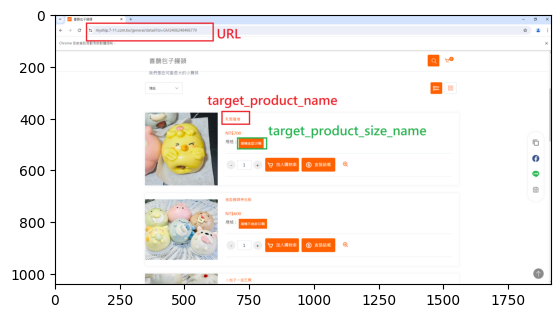

In [13]:
img = np.asarray(Image.open('Example.png'))
plt.imshow(img)